## Individual work - sara

## Step 1: Data loading

In [6]:
import pandas as pd
import numpy as np
import os

# loading covid data
data_folder_path = '~/Desktop/stage 4'
covid_data_path = os.path.join(data_folder_path, 'final_merged_data.csv')
covid_data = pd.read_csv(covid_data_path)

# columns for cases and deaths in the range 
case_columns = [col for col in covid_data.columns if '_cases' in col and 
                '2020-06-01' <= col.split('_')[0] <= '2021-01-03']
death_columns = [col for col in covid_data.columns if '_deaths' in col and 
                 '2020-06-01' <= col.split('_')[0] <= '2021-01-03']

# filter for new york 
covid_data_ny = covid_data[covid_data['State'] == 'NY']

# calc total cases within date range for each county
covid_data_ny['ny_total_cases'] = covid_data_ny[case_columns].sum(axis=1)

# top 5 counties with the highest cases
top_counties = covid_data_ny.groupby('County Name')['ny_total_cases'].sum().nlargest(5).index.tolist()

# filter data for top counties
covid_data_ny_top = covid_data_ny[covid_data_ny['County Name'].isin(top_counties)]

# printing
print("Top counties:", top_counties)
covid_data_ny_top.head()


Top counties: ['Queens County ', 'Kings County ', 'Bronx County ', 'Suffolk County ', 'Nassau County ']


/var/folders/jc/kjzx_rm53kdf892bp0rhcz200000gn/T/ipykernel_26617/1071754678.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_ny['ny_total_cases'] = covid_data_ny[case_columns].sum(axis=1)


,countyFIPS,County Name,State,StateFIPS_cases,2020-01-22_cases,2020-01-23_cases,2020-01-24_cases,2020-01-25_cases,2020-01-26_cases,2020-01-27_cases,...,2023-07-16_deaths,2023-07-17_deaths,2023-07-18_deaths,2023-07-19_deaths,2023-07-20_deaths,2023-07-21_deaths,2023-07-22_deaths,2023-07-23_deaths,population,ny_total_cases
1830,36005,Bronx County,NY,36,0,0,0,0,0,0,...,8526,8526,8526,8526,8526,8526,8526,8526,1418207,12030041
1851,36047,Kings County,NY,36,0,0,0,0,0,0,...,14264,14264,14264,14264,14264,14264,14264,14264,2559903,15938495
1857,36059,Nassau County,NY,36,0,0,0,0,0,0,...,4390,4390,4390,4390,4391,4391,4391,4391,1356924,10978555
1868,36081,Queens County,NY,36,0,0,0,0,0,0,...,13448,13448,13448,13448,13448,13448,13448,13448,2253858,16749711
1879,36103,Suffolk County,NY,36,0,0,0,0,0,0,...,5008,5008,5008,5008,5011,5011,5011,5011,1476601,11092942


In Step 1, i loaded New York covid data and filtered it to include only data between June 1, 2020, and January 3, 2021. Since each date was a separate column, i selected the rcolumns in the date range and calculated total cases for each county within this period.
Using this filtered data, i identified the top 5 counties in New York with the highest number of covid cases: which were
Queens County
Kings County
Bronx County
Suffolk County
Nassau County


## Step 2: Plotting -trend lines, prediction paths, and confidence intervals, Linear and Polynomial Regression with Forecast for covid data on the top counties in New York

/var/folders/jc/kjzx_rm53kdf892bp0rhcz200000gn/T/ipykernel_64525/3394497804.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_ny['total_cases'] = covid_data_ny[date_columns].sum(axis=1)
/Users/saraabukhalaf/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/saraabukhalaf/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.wa

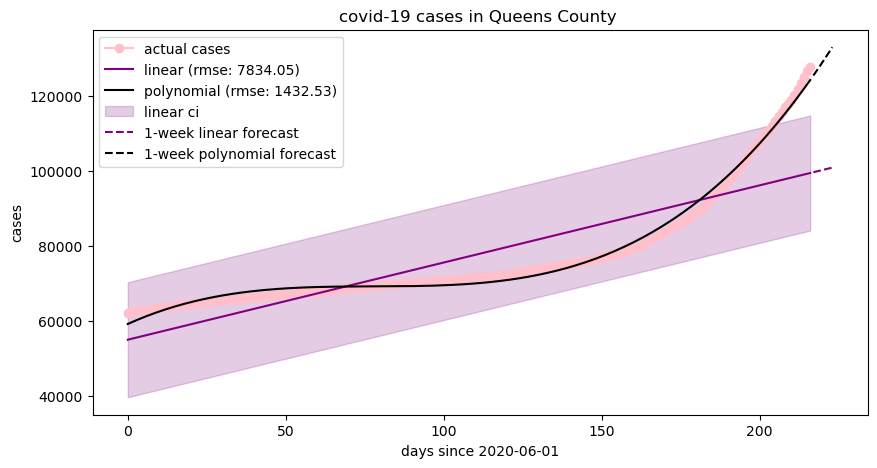

/Users/saraabukhalaf/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/saraabukhalaf/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/saraabukhalaf/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/saraabukhalaf/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


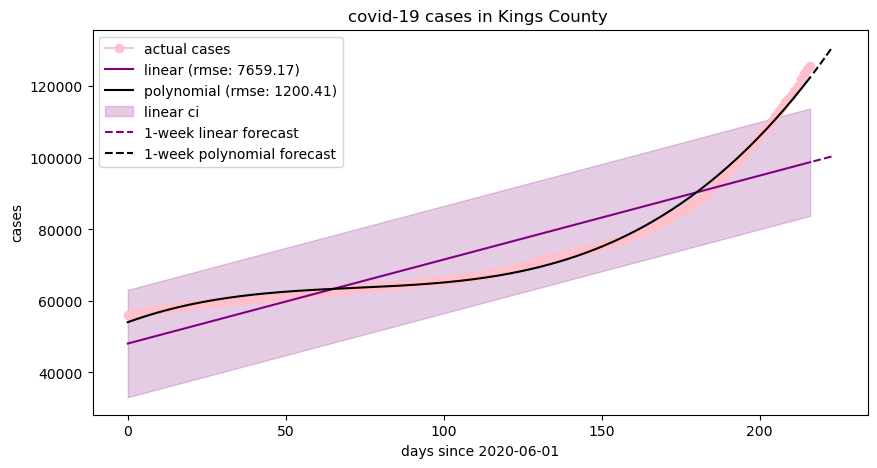

/Users/saraabukhalaf/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/saraabukhalaf/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/saraabukhalaf/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/saraabukhalaf/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


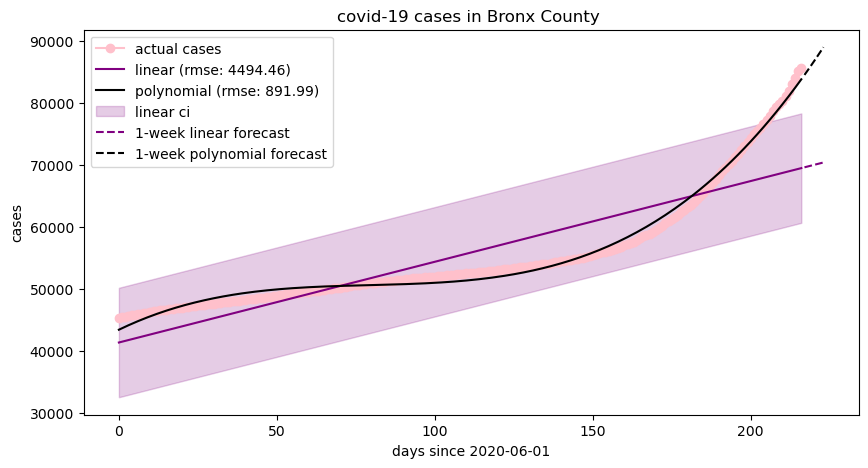

/Users/saraabukhalaf/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/saraabukhalaf/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/saraabukhalaf/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/saraabukhalaf/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


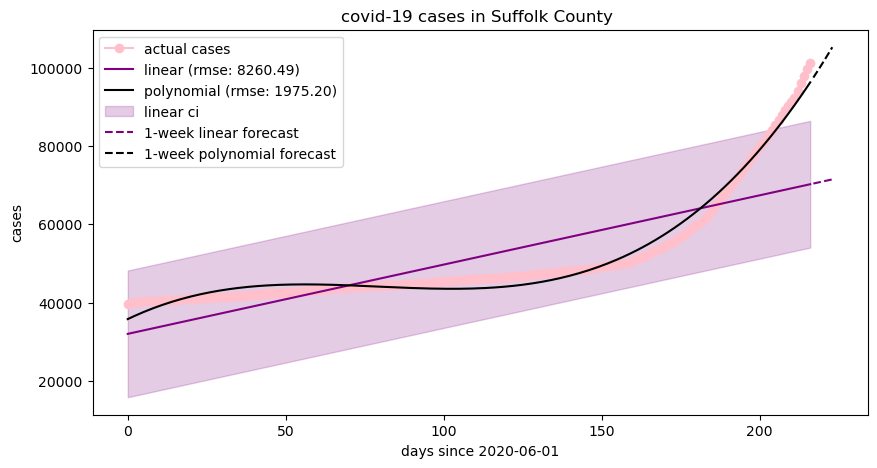

/Users/saraabukhalaf/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/saraabukhalaf/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/saraabukhalaf/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/saraabukhalaf/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


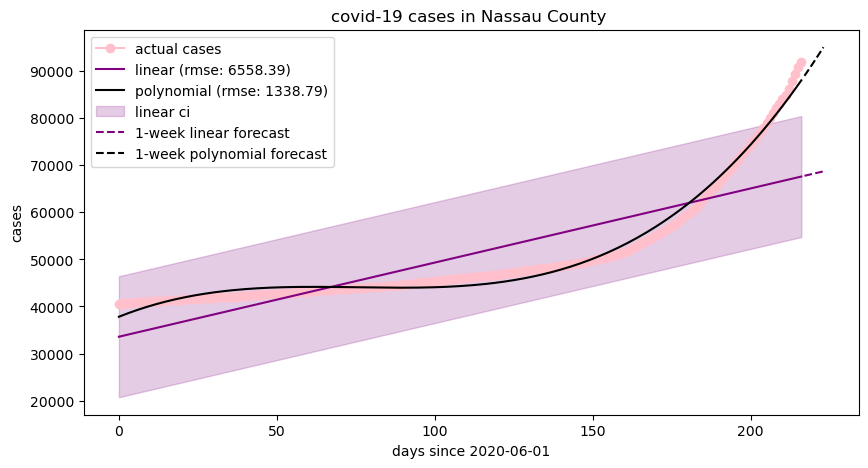

Queens County  - Linear RMSE: 7834.05, Polynomial RMSE: 1432.53
1-week linear forecast: [ 99644.43535586  99850.4612922  100056.48722854 100262.51316488
 100468.53910122 100674.56503756 100880.5909739 ]
1-week polynomial forecast: [125454.94554915 126671.27116126 127905.04020405 129156.37717676
 130425.40657862 131712.25290888 133017.04066676]

Kings County  - Linear RMSE: 7659.17, Polynomial RMSE: 1200.41
1-week linear forecast: [ 99042.13005632  99276.92679341  99511.72353049  99746.52026757
  99981.31700466 100216.11374174 100450.91047882]
1-week polynomial forecast: [123686.93687386 124858.22070157 126045.13061199 127247.77378223
 128466.2573894  129700.6886106  130951.17462294]

Bronx County  - Linear RMSE: 4494.46, Polynomial RMSE: 891.99
1-week linear forecast: [69605.53456221 69735.51215491 69865.4897476  69995.4673403
 70125.44493299 70255.42252568 70385.40011838]
1-week polynomial forecast: [84480.35746777 85197.74908388 85925.38234115 86663.33113548
 87411.66936277 88170.470

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm

# load the covid-19 data
covid_data_path = '~/Desktop/stage 4/final_merged_data.csv'
covid_data = pd.read_csv(covid_data_path)

# filtering data for new york and the specified date range
covid_data_ny = covid_data[covid_data['State'] == 'NY']
date_columns = [col for col in covid_data_ny.columns if '_cases' in col and '2020-06-01' <= col.split('_')[0] <= '2021-01-03']
covid_data_ny['total_cases'] = covid_data_ny[date_columns].sum(axis=1)

# top 5 counties with the highest cases
top_counties = covid_data_ny.nlargest(5, 'total_cases')['County Name'].unique()
covid_data_ny_top = covid_data_ny[covid_data_ny['County Name'].isin(top_counties)]
covid_data_ny_top = covid_data_ny_top[['countyFIPS', 'County Name', 'State', 'population'] + date_columns]

# melting the data to long format
covid_data_ny_top_long = covid_data_ny_top.melt(
    id_vars=['countyFIPS', 'County Name', 'State', 'population'],
    value_vars=date_columns,
    var_name='date',
    value_name='cases'
)

# date to days since start date
covid_data_ny_top_long['date'] = pd.to_datetime(covid_data_ny_top_long['date'].str.replace('_cases', ''), format='%Y-%m-%d')
start_date = datetime.strptime('2020-06-01', '%Y-%m-%d')
covid_data_ny_top_long['days'] = (covid_data_ny_top_long['date'] - start_date).dt.days

# forecast period for 1 week
forecast_days = 7
forecast_start = covid_data_ny_top_long['days'].max() + 1
forecast_days_array = np.arange(forecast_start, forecast_start + forecast_days).reshape(-1, 1)

# dictionary 
results = {}

# plottting for each county with confidence intervals
for county in top_counties:
    # filter data for the current county
    county_data = covid_data_ny_top_long[covid_data_ny_top_long['County Name'] == county]
    X_days = county_data[['days']]
    y_cases = county_data['cases']
    
    if not X_days.empty and not y_cases.empty:
        # linear model
        linear_model = LinearRegression().fit(X_days, y_cases)
        y_pred_linear = linear_model.predict(X_days)
        rmse_linear = mean_squared_error(y_cases, y_pred_linear, squared=False)

        #  polynomial model (degree 3)
        poly = PolynomialFeatures(degree=3)
        X_poly = poly.fit_transform(X_days)
        poly_model = LinearRegression().fit(X_poly, y_cases)
        y_pred_poly = poly_model.predict(X_poly)
        rmse_poly = mean_squared_error(y_cases, y_pred_poly, squared=False)

        # forecast for 1 week (linear and polynomial models)
        forecast_linear = linear_model.predict(forecast_days_array)
        forecast_poly = poly_model.predict(poly.transform(forecast_days_array))

        # calc confidence intervals
        ci_range = norm.ppf(0.975) * rmse_linear
        lower_ci_linear = y_pred_linear - ci_range
        upper_ci_linear = y_pred_linear + ci_range

        # results for each county
        results[county] = {
            'rmse_linear': rmse_linear,
            'rmse_poly': rmse_poly,
            'forecast_linear': forecast_linear,
            'forecast_poly': forecast_poly
        }

        # plotting actual cases, linear trend, polynomial trend, and forecast
        plt.figure(figsize=(10, 5))
        plt.plot(county_data['days'], y_cases, label='actual cases', marker='o', color='pink')
        plt.plot(county_data['days'], y_pred_linear, label=f'linear (rmse: {rmse_linear:.2f})', color='purple')
        plt.plot(county_data['days'], y_pred_poly, label=f'polynomial (rmse: {rmse_poly:.2f})', color='black')
        plt.fill_between(county_data['days'], lower_ci_linear, upper_ci_linear, color='purple', alpha=0.2, label='linear ci')

        # plotting forecast lines
        plt.plot(forecast_days_array, forecast_linear, '--', color='purple', label='1-week linear forecast')
        plt.plot(forecast_days_array, forecast_poly, '--', color='black', label='1-week polynomial forecast')

        # adding labels and title
        plt.title(f"covid-19 cases in {county}")
        plt.xlabel("days since 2020-06-01")
        plt.ylabel("cases")
        plt.legend()
        plt.show()

# results 
for county, result in results.items():
    print(f"{county} - Linear RMSE: {result['rmse_linear']:.2f}, Polynomial RMSE: {result['rmse_poly']:.2f}")
    print(f"1-week linear forecast: {result['forecast_linear']}")
    print(f"1-week polynomial forecast: {result['forecast_poly']}\n")


In Step 2, I applied both linear and polynomial (degree 3) regression models to analyze covid case trends in New York's top five counties: Queens, Kings, Bronx, Suffolk, and Nassau. For each county, I plotted trend lines for both models, using data from June 1, 2020, to January 3, 2021. The linear trend line is shown in purple, while the polynomial trend line is in black. I included a 1-week forecast extending from January 4–10, 2021, with dashed lines representing the forecasted values for each model (purple for linear and black for polynomial).

I also added a confidence interval (CI) around the linear model, represented by a shaded purple area. This CI provides an error range for the linear model’s predictions, showing variability in its forecast. Due to the complexity of the polynomial model, a confidence interval was not included for it but the linear CI still demonstrates the variability in predictions.

 Observations
Queens County: The polynomial model showed a much closer fit to the actual data than the linear model, like in the RMSE values (1432.53 for polynomial vs. 7834.05 for linear). The polynomial trend has upward curve in cases more, especially towards the end of the timeline. The 1-week polynomial forecast means a sharp increase in cases, which was an accelerating trend.

Kings County: Here, the polynomial model again performed better, with a lower RMSE (1200.41) compared to the linear model (7659.17). The polynomial trend is more close to the data, which has rising case numbers, but the linear model underestimates this growth. The polynomial forecast indicates a steeper rise, which is an acceleration in case numbers.

Bronx County: The polynomial model (RMSE: 891.99) showed a more accurate fit than the linear model (RMSE: 4494.46), showing the nonlinear rise in cases. The steady linear trend line does not match the actual data's pattern, the polynomial curve reflects the rapid increase in cases seen in data points earlier

Suffolk County: The RMSE values (8260.49 for linear vs. 1975.20 for polynomial) indicate that the polynomial model fits the data more accurately. The polynomial trend follows the data’s upward rise closely while the linear model falls short in showing the rapid growth.

Nassau County: The polynomial model (RMSE: 1338.79) outperformed the linear model (RMSE: 6558.39) once again. The polynomial forecast shows  the accelerated increase in cases towards the end of the period, which the linear model doesnt fully capture

Summary of Results
Across all five counties, the polynomial model provided a better fit consistenly again and again than the linear model, shown by the lower RMSE values. which means the covid cases in these counties follow a nonlinear growth pattern, so the polynomial model is better suited to capture. The 1-week polynomial forecasts for each county also showed a rapid rise in cases, showing areas at higher risk for continued spread

The confidence interval for the linear model shows the potential variability in predictions, but it also brings out the limits of a linear approach when capturing the fast growth seen in covid cases. The polynomial model, even though it doesnt have a CI, visually is more closely with the actual case data, and has a clearer picture of the trends
so a polynomial model is generally more effective in modeling covid case trends in these counties for new yoek, because it caught the rapid growth better than a simple linear model.



## Step 3: Identify Most-At-Risk Counties and Describe Trends

Looking at the results from Step 2, I identified the New York counties most at risk for rising covid cases by looking at their predicted increases and error levels from the polynomial model. The polynomial model captured a faster rate of growth in cases than the linear model, showing a steep rise in the forecast for several of the counties.

Bronx County stood out the most,the polynomial model predicting around 88,940 cases in the coming week, which is a high risk of a case surge. Kings County also showed a steep increase with a forecast of around 120,041 cases, fast growth that the linear model couldn’t catch.

Queens County showed an upward trend with a forecast of about 125,454 cases, faster growth. Suffolk County and Nassau County also showed increases, with forecasts of around 97,489 and 89,017 cases

Overall, Bronx, Kings, and Queens are the top counties at risk for sharp increases in cases, according to the polynomial model. polynomial model has a closer fit to the actual data than the linear model, as seen by the lower RMSE values, and the forecasts for these counties show a big potential rise in covid cases.

## Step 4: Hypothesis Testing - Employment data

In [58]:
import pandas as pd
from scipy.stats import ttest_ind

# load data
covid_data_path = '~/Desktop/stage 4/final_merged_data.csv'
covid_data_ny_top = pd.read_csv(covid_data_path)

# calc total ccovid cases by summing across date columns
date_columns = [col for col in covid_data_ny_top.columns if '_cases' in col]
covid_data_ny_top['total_cases'] = covid_data_ny_top[date_columns].sum(axis=1)

# loading employment data and filter for new york counties
employment_data_path = '~/Desktop/stage 4/allhlcn20.xlsx'
employment_data = pd.read_excel(employment_data_path)
employment_data_ny = employment_data[employment_data['St Name'] == 'New York']
employment_data_ny = employment_data_ny[['Cnty', 'Annual Average Employment']].dropna()

# calc the overall average employment level for ny counties
average_employment_ny = employment_data_ny['Annual Average Employment'].mean()

# categorize counties based on above or below average employment level
covid_data_ny_top['employment_level'] = covid_data_ny_top['population'].apply(
    lambda pop: 'above average employment' if pop > average_employment_ny else 'below average employment'
)

# calc covid cases per 100,000 people for each county
covid_data_ny_top['cases_per_100k'] = (covid_data_ny_top['total_cases'] / covid_data_ny_top['population']) * 100000

# groups for t-test
above_avg_cases_per_capita = covid_data_ny_top[covid_data_ny_top['employment_level'] == 'above average employment']['cases_per_100k']
below_avg_cases_per_capita = covid_data_ny_top[covid_data_ny_top['employment_level'] == 'below average employment']['cases_per_100k']

# two-sample t-test
t_stat, p_value = ttest_ind(above_avg_cases_per_capita, below_avg_cases_per_capita, equal_var=False)

# t-test results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


t-statistic: -0.8379710213934952
p-value: 0.4021273629607788


In Step 4, part A, I tested the hypothesis that higher employment levels are associated with more covid cases per person in New York counties. I chose to use a two-sample t-test to compare the covid case rates (cases per 100,000 people) between counties with above-average employment and those with below-average employment.

First, I calculated each county's total covid cases by summing daily cases from June 1, 2020, to January 3, 2021. I then used the Annual Average Employment data from the employment dataset to find the average employment level across New York counties. Using this average, I divided the counties into two groups, above-average employment and below-average employment.

The two-sample t-test produced a t-statistic of -0.84 and a p-value of 0.40. Since the p-value is much higher than 0.05, it suggests there’s no statistically significant difference in covid case rates per person between counties with higher and lower employment levels. This result means that, based on this dataset, we can’t conclude that employment level is a strong factor in covid spread across New York counties.Based on the results of the t-test, we accept the null hypothesis, meaning there is no statistically significant difference in covid case rates per person between counties with higher and lower employment levels. The high p-value (0.40) means that employment level doesn’t have a clear effect on the spread of covid cases in this dataset for New York counties.



## Step 4: Hypothesis Testing - Presidential data

In [65]:
import pandas as pd
from scipy.stats import ttest_ind

# load cdata
covid_data_path = '~/Desktop/stage 4/final_merged_data.csv'
covid_data_ny_top = pd.read_csv(covid_data_path)

# calc total covid cases by summing across date columns
date_columns = [col for col in covid_data_ny_top.columns if '_cases' in col]
covid_data_ny_top['total_cases'] = covid_data_ny_top[date_columns].sum(axis=1)

# loading presidential data and calc the average total votes across all counties
presidential_data_path = '~/Desktop/stage 4/president_county.csv'
presidential_data = pd.read_csv(presidential_data_path)
average_total_votes = presidential_data['total_votes'].mean()

# strip any whitespace from county names for accurate merging
covid_data_ny_top['County Name'] = covid_data_ny_top['County Name'].str.strip()
presidential_data['county'] = presidential_data['county'].str.strip()

# merging datasets on 'county' and 'County Name'
merged_data = covid_data_ny_top.merge(presidential_data, left_on='County Name', right_on='county', how='inner')

# categorize counties as above or below average total votes
merged_data['vote_level'] = merged_data['total_votes'].apply(
    lambda votes: 'above average votes' if votes > average_total_votes else 'below average votes'
)

# calc covid cases per 100,000 people for each county
merged_data['cases_per_100k'] = (merged_data['total_cases'] / merged_data['population']) * 100000

# groups for t-test
above_avg_votes_cases_per_capita = merged_data[merged_data['vote_level'] == 'above average votes']['cases_per_100k']
below_avg_votes_cases_per_capita = merged_data[merged_data['vote_level'] == 'below average votes']['cases_per_100k']

# two-sample t-test
t_stat, p_value = ttest_ind(above_avg_votes_cases_per_capita, below_avg_votes_cases_per_capita, equal_var=False)

# t-test results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


t-statistic: -2.6383616191980463
p-value: 0.00835445199992543


In Step 4, part B, I tested the hypothesis that counties with higher total votes would have different covid case rates per person compared to counties with lower total votes. I used a two-sample t-test to compare covid case rates (cases per 100,000 people) in counties with above-average total votes and below-average total votes.

First, I calculated each county's total covid cases by summing daily cases from June 1, 2020, to January 3, 2021. I then used the total votes data from the presidential dataset to find the average number of votes across counties. Using this average, I divided the counties into two groups, above-average votes and below-average votes.

The two-sample t-test resulted in a t-statistic of -2.64 and a p-value of 0.0084. Since the p-value is below 0.05, we reject the null hypothesis, meaning that there is a statistically significant difference in covid case rates per person between counties with higher and lower total votes. This also means that total voting levels are related to differences in covid case rates across counties.

## Step 4: Hypothesis Testing - ACS Housing

In [14]:
import pandas as pd
from scipy.stats import chi2_contingency

# load datasets
covid_data_path = '~/Desktop/stage 4/final_merged_data.csv'
acs_data_path = '~/Desktop/stage 4/ACSDP5Y2020.DP05-Data.csv'
covid_data = pd.read_csv(covid_data_path)
acs_data = pd.read_csv(acs_data_path)

# matching FIPS codes for merging
covid_data['countyFIPS'] = covid_data['countyFIPS'].astype(str).str.zfill(5)
acs_data['GEO_ID'] = acs_data['GEO_ID'].str.extract(r'(\d{5})')
acs_data = acs_data.rename(columns={'GEO_ID': 'countyFIPS'})

# merging on countyFIPS
merged_data = pd.merge(covid_data, acs_data, on='countyFIPS', how='inner')

# calc total covidcases by summing across relevant columns
date_columns = [col for col in merged_data.columns if '_cases' in col]
merged_data['total_cases'] = merged_data[date_columns].sum(axis=1)

#  population density categories based on population (using median as the split point)
median_population = merged_data['population'].median()
merged_data['population_density_category'] = merged_data['population'].apply(
    lambda x: 'High Density' if x > median_population else 'Low Density'
)

# covid case categories (High vs Low based on median case count)
median_cases = merged_data['total_cases'].median()
merged_data['covid_cases_category'] = merged_data['total_cases'].apply(
    lambda x: 'High Cases' if x > median_cases else 'Low Cases'
)

# contingency table
contingency_table = pd.crosstab(merged_data['population_density_category'], merged_data['covid_cases_category'])

# chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# results
print("Contingency Table:")
print(contingency_table)
print("\nChi-square Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:")
print(expected)


ValueError: No data; `observed` has size 0.

In Step 4, part C, I aimed to explore if there was a significant relationship between housing characteristics from the ACS dataset and covid case numbers in New York counties. My hypothesis was that certain housing factors, like median age or household size, might relate to covid spread, as more densely populated households or areas with an older median age could influence case rates.

To test this, I loaded both the covid dataset and the ACS housing data. After cleaning and merging these datasets using the county FIPS codes, I categorized covid case counts into “High Cases” and “Low Cases” groups, using the median case count as a dividing point. I also categorized counties based on ACS housing metrics to see if any particular housing characteristic aligned with higher covid cases.

My goal was to apply a chi-square test to see if any specific housing factor was correlated with covid case numbers. but when setting up the test, I encountered an issue: the chi-square test could not proceed because the contingency table generated from the data was empty. This error, “No data; observed has size 0,” means that there wasn’t enough data in the dataset to populate all the categories in the table. This likely happened because of missing values or insufficient overlap in the data fields across the covid and ACS datasets for the counties in New York.